In [1]:
import numpy as np
import pandas as pd
import math

In [2]:
def AI(matrix):
  ch=0
  for x in range(0, matrix.shape[0]):
    for y in range (0, matrix.shape[1]-1):
    
      if matrix[x,y]==1 and matrix[x,y+1]==1:
        ch=ch+1
  cv=0
  for x in range(0, matrix.shape[0]-1):
    for y in range (0, matrix.shape[1]):
   
      if matrix[x,y]==1 and matrix[x+1,y]==1:
        cv=cv+1
  eii= ch+cv
  Ai= np.count_nonzero(matrix)
  n= math.trunc(math.sqrt(Ai))
  m = Ai - n**2
  if m==0:
    maxeii= 2*n*(n-1)
  if m<=n and m>0:
    maxeii= 2*n*(n-1)+2*m-1
  if m>n:
    maxeii= 2*n*(n-1)+2*m-2

  AI= eii/maxeii
#  print (AI)
  return round(AI,2)
#  if AI==0:
#    print(2)
#    return 2
#  if 0<AI<=0.90:
#    print(1)
#    return 1
#  if AI>0.90:
#    print(0)
#    return 0

In [3]:
def AI_dataframe(raster):
  
  if np.isnan(raster).sum() != 0:
    raster[np. isnan(raster)] = 0 # se modifica el archivo original. Se sustituyen los valores NaN por 0s.

  raster2=np.zeros((raster.shape[0]+4,raster.shape[1]+4))

  raster2[2:-2,2:-2] = raster

  AIMW= np.zeros((raster.shape[0],raster.shape[1]) )

  AI_list=[]
  position_list=[]

  for x2 in range (2,raster2.shape[0]-2):
    for y2 in range(2, raster2.shape[1]-2):
      if raster2[x2,y2]==1:
        MW=np.array([[raster2[x2-2,y2-2],raster2[x2-2,y2-1],raster2[x2-2,y2],raster2[x2-2,y2+1],raster2[x2-2,y2+2]],
                      [raster2[x2-1,y2-2],raster2[x2-1,y2-1],raster2[x2-1,y2],raster2[x2-1,y2+1],raster2[x2-1,y2+2]],
                      [raster2[x2,y2-2],raster2[x2,y2-1],raster2[x2,y2],raster2[x2,y2+1],raster2[x2,y2+2]],
                      [raster2[x2+1,y2-2],raster2[x2+1,y2-1],raster2[x2+1,y2],raster2[x2+1,y2+1],raster2[x2+1,y2+2]],
                      [raster2[x2+2,y2-2],raster2[x2+2,y2-1],raster2[x2+2,y2],raster2[x2+2,y2+1],raster2[x2+2,y2+2]]])
        if np.count_nonzero(MW)==1: 
          x3= x2-2
          y3 = y2-2
          AIMW[x3,y3]= 0 
          AI_list.append(AIMW[x3,y3])
          position_list.append([x3,y3])
         
        else:
          x3=x2-2
          y3=y2-2
          AIMW[x3,y3]=AI(MW)
          AI_list.append(AIMW[x3,y3])
          position_list.append([x3,y3])


      else:
        x3=x2-2
        y3=y2-2
        AIMW[x3,y3]=-999999
        #AI_list.append(AIMW[x3,y3])
        #position_list.append([x3,y3])

#AIMW
  df=pd.DataFrame()
  df['AI']=AI_list
  df['Position']=position_list
  #return df
  return AIMW, df

In [4]:
# Map of Catalonia with Fuel 1 (Raster format)

In [5]:
import matplotlib.pyplot as plt
import rasterio

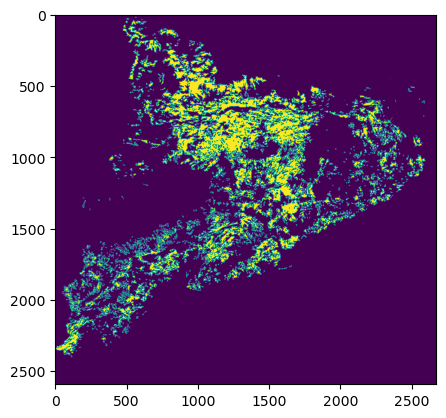

In [6]:
a = rasterio.open('/home/coca/Maps_TFM/Raster/Catalonia/CatFuel1.tif')
CatFuel1= a.read(1)
plt.imshow(CatFuel1)

In [7]:
CatFuel1_AI1, CatFuel1_AI2= AI_dataframe(CatFuel1)

In [8]:
CatFuel1_AI2

,AI,Position
0,1.00,"[19, 563]"
1,0.93,"[20, 563]"
2,0.94,"[20, 564]"
3,0.95,"[20, 565]"
4,0.88,"[21, 563]"
...,...,...
752082,0.80,"[2404, 118]"
752083,0.80,"[2404, 119]"
752084,0.88,"[2405, 117]"
752085,0.88,"[2405, 118]"


In [9]:
# To save the dataframe to later use
CatFuel1_AI2.to_pickle("/home/coca/Maps_TFM/Raster/Output/AI (different size MW)/MW5/Fuel1/AIMW5Fuel1.pkl")

In [10]:
# To save the array for later use
np.save("/home/coca/Maps_TFM/Raster/Output/AI (different size MW)/MW5/Fuel1/AIMW5Fuel1.npy", CatFuel1_AI1, allow_pickle=True, fix_imports=True)

In [11]:
#To save the array as GeoTiff file
driver = 'GTiff'
height=CatFuel1_AI1.shape[0]
width=CatFuel1_AI1.shape[1]
count=1
dtype=CatFuel1_AI1.dtype

In [12]:
from rasterio.crs import CRS
crs=CRS.from_epsg(25831)

In [13]:
from rasterio.transform import from_origin
transform = from_origin(260100.0000000000000000,4748000.0000000000000000,100,100)

In [14]:
with rasterio.open("/home/coca/Maps_TFM/Raster/Output/AI (different size MW)/MW5/Fuel1/AIMW5Fuel1.tif",'w',
                   driver=driver,
                   height=height,
                   width=width,
                   count=count,
                   dtype=dtype,
                   crs=crs,
                   transform=transform) as dst:
                   dst.write(CatFuel1_AI1, indexes=1)

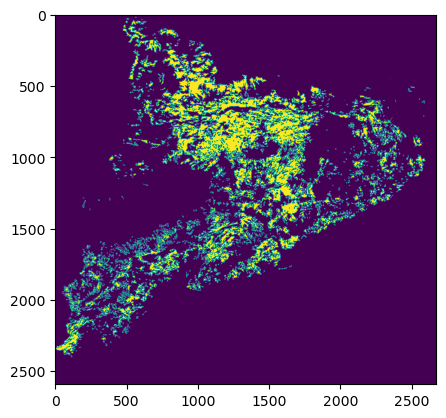

In [15]:
plt.imshow(CatFuel1_AI1)
plt.show()

In [16]:
# Map of Catalonia with Fuel 1 (Polygon format)

In [17]:
import geopandas as gpd
from shapely.geometry import polygon

In [18]:
CatFuel1P= gpd.read_file("/home/coca/Maps_TFM/Polygon/Catalonia/CatFuel1.geojson")

<AxesSubplot: >

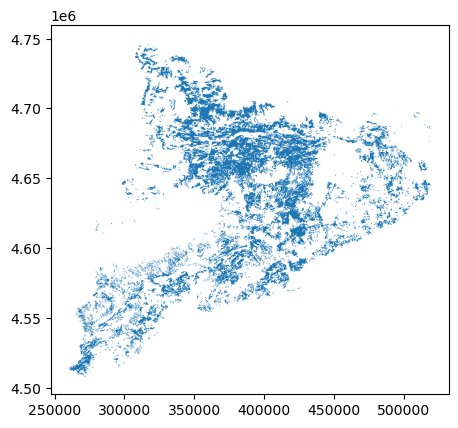

In [19]:
CatFuel1P.plot()

In [20]:
# Histograms comparison

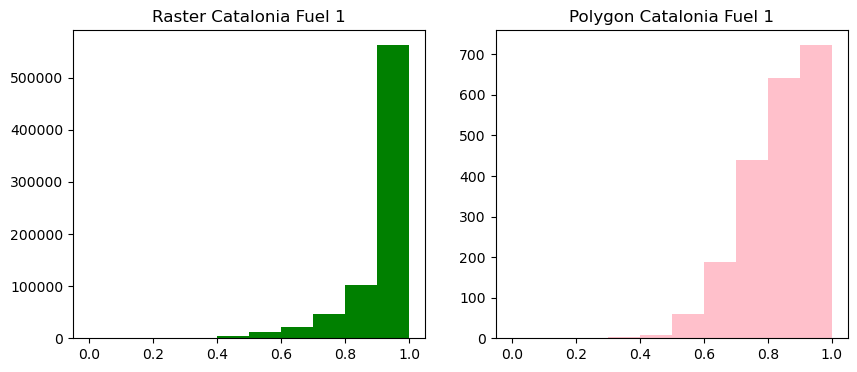

In [21]:
fig = plt.figure(figsize=(10, 4))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
 
ax1.hist(CatFuel1_AI2['AI'], bins=[0,0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90,1], color="green")
ax2.hist(CatFuel1P['AI'], bins= [0,0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90,1], color="pink")
 
ax1.set_title('Raster Catalonia Fuel 1')
ax2.set_title('Polygon Catalonia Fuel 1')

 
plt.show()

In [22]:
# Map of Catalonia with Fuel 2 (Raster format)

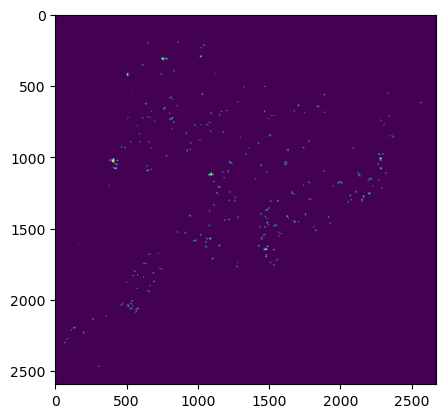

In [23]:
b = rasterio.open('/home/coca/Maps_TFM/Raster/Catalonia/CatFuel2.tif')
CatFuel2= b.read(1)
plt.imshow(CatFuel2)

In [24]:
CatFuel2_AI1, CatFuel2_AI2 = AI_dataframe(CatFuel2)

In [25]:
CatFuel2_AI2

,AI,Position
0,1.00,"[6, 512]"
1,1.00,"[6, 513]"
2,1.00,"[15, 552]"
3,1.00,"[15, 553]"
4,0.00,"[17, 557]"
...,...,...
12178,0.89,"[2472, 307]"
12179,0.94,"[2472, 308]"
12180,0.95,"[2472, 309]"
12181,0.93,"[2472, 310]"


In [26]:
# To save the dataframe to later use
CatFuel2_AI2.to_pickle("/home/coca/Maps_TFM/Raster/Output/AI (different size MW)/MW5/Fuel2/AIMW5Fuel2.pkl")

In [27]:
# To save the array for later use
np.save("/home/coca/Maps_TFM/Raster/Output/AI (different size MW)/MW5/Fuel2/AIMW5Fuel2.npy", CatFuel2_AI1, allow_pickle=True, fix_imports=True)

In [28]:
#To save the array as GeoTiff file
driver = 'GTiff'
height= CatFuel2_AI1.shape[0]
width= CatFuel2_AI1.shape[1]
count=1
dtype= CatFuel2_AI1.dtype

In [29]:
with rasterio.open("/home/coca/Maps_TFM/Raster/Output/AI (different size MW)/MW5/Fuel2/AIMW5Fuel2.tif",'w',
                   driver=driver,
                   height=height,
                   width=width,
                   count=count,
                   dtype=dtype,
                   crs=crs,
                   transform=transform) as dst:
                   dst.write(CatFuel2_AI1, indexes=1)

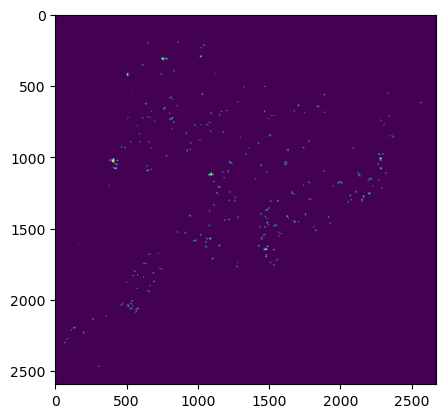

In [30]:
plt.imshow(CatFuel2_AI1)
plt.show()

In [31]:
# Map of Catalonia with Fuel 2 (Polygon format)

<AxesSubplot: >

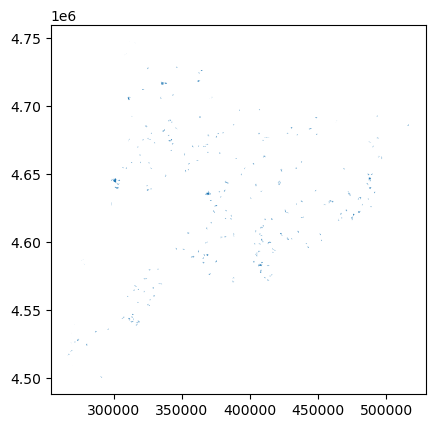

In [32]:
CatFuel2P= gpd.read_file("/home/coca/Maps_TFM/Polygon/Catalonia/CatFuel2.geojson")
CatFuel2P.plot()

In [33]:
# Histograms comparison

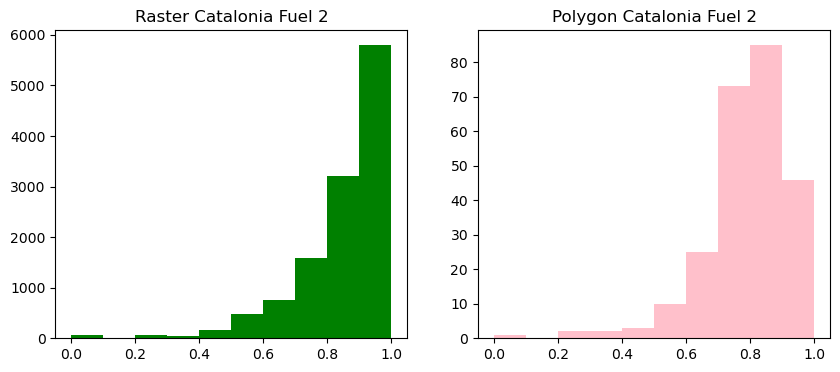

In [34]:
fig = plt.figure(figsize=(10, 4))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
 
ax1.hist(CatFuel2_AI2['AI'], bins=[0,0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90,1], color="green")
ax2.hist(CatFuel2P['AI'], bins= [0,0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90,1], color="pink")
 
ax1.set_title('Raster Catalonia Fuel 2')
ax2.set_title('Polygon Catalonia Fuel 2')

 
plt.show()

In [35]:
# Map of Catalonia with Fuel 3 (Raster format)

In [36]:
c = rasterio.open('/home/coca/Maps_TFM/Raster/Catalonia/CatFuel3.tif')
CatFuel3= c.read(1)
#plt.imshow(CatFuel3)

In [37]:
CatFuel3_AI1, CatFuel3_AI2 = AI_dataframe(CatFuel3)

In [38]:
CatFuel3_AI2

,AI,Position
0,0.50,"[1, 531]"
1,0.80,"[2, 524]"
2,0.75,"[2, 533]"
3,0.80,"[2, 534]"
4,0.92,"[3, 523]"
...,...,...
987353,0.85,"[2566, 268]"
987354,0.82,"[2566, 269]"
987355,0.92,"[2566, 270]"
987356,0.80,"[2567, 269]"


In [39]:
# To save the dataframe to later use
CatFuel3_AI2.to_pickle("/home/coca/Maps_TFM/Raster/Output/AI (different size MW)/MW5/Fuel3/AIMW5Fuel3.pkl")

In [40]:
# To save the array for later use
np.save("/home/coca/Maps_TFM/Raster/Output/AI (different size MW)/MW5/Fuel3/AIMW5Fuel3.npy", CatFuel3_AI1, allow_pickle=True, fix_imports=True)

In [41]:
#To save the array as GeoTiff file
driver = 'GTiff'
height=CatFuel3_AI1.shape[0]
width=CatFuel3_AI1.shape[1]
count=1
dtype=CatFuel3_AI1.dtype

In [42]:
with rasterio.open("/home/coca/Maps_TFM/Raster/Output/AI (different size MW)/MW5/Fuel3/AIMW5Fuel3.tif",'w',
                   driver=driver,
                   height=height,
                   width=width,
                   count=count,
                   dtype=dtype,
                   crs=crs,
                   transform=transform) as dst:
                   dst.write(CatFuel3_AI1, indexes=1)

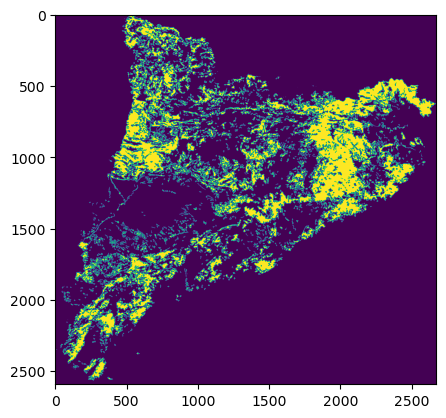

In [43]:
plt.imshow(CatFuel3_AI1)
plt.show()

In [44]:
# Map of Catalonia with Fuel 3 (Polygon format)

In [45]:
CatFuel3P= gpd.read_file("/home/coca/Maps_TFM/Polygon/Catalonia/CatFuel3.geojson")
#CatFuel3P.plot()

In [46]:
# Histograms comparison

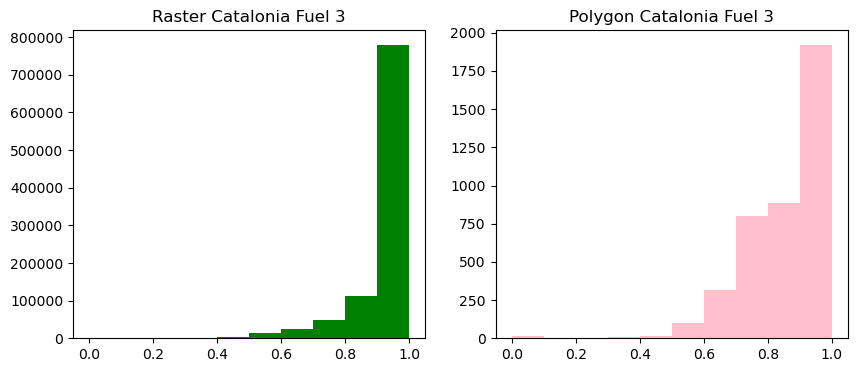

In [47]:
fig = plt.figure(figsize=(10, 4))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
 
ax1.hist(CatFuel3_AI2['AI'], bins=[0,0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90,1], color="green")
ax2.hist(CatFuel3P['AI'], bins= [0,0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90,1], color="pink")
 
ax1.set_title('Raster Catalonia Fuel 3')
ax2.set_title('Polygon Catalonia Fuel 3')

 
plt.show()

In [48]:
# Map of Catalonia with Fuel 4 (Raster format)

In [49]:
d = rasterio.open('/home/coca/Maps_TFM/Raster/Catalonia/CatFuel4.tif')
CatFuel4= d.read(1)
#plt.imshow(CatFuel4)

In [50]:
CatFuel4_AI1, CatFuel4_AI2 = AI_dataframe(CatFuel4)

In [51]:
CatFuel4_AI2

,AI,Position
0,0.92,"[0, 526]"
1,0.73,"[1, 524]"
2,0.82,"[1, 525]"
3,0.95,"[1, 526]"
4,0.95,"[1, 527]"
...,...,...
115211,0.92,"[1256, 1833]"
115212,0.92,"[1256, 1834]"
115213,1.00,"[1257, 1826]"
115214,1.00,"[1257, 1827]"


In [52]:
# To save the dataframe to later use
CatFuel4_AI2.to_pickle("/home/coca/Maps_TFM/Raster/Output/AI (different size MW)/MW5/Fuel4/AIMW5Fuel4.pkl")

In [53]:
# To save the array for later use
np.save("/home/coca/Maps_TFM/Raster/Output/AI (different size MW)/MW5/Fuel4/AIMW5Fuel4.npy", CatFuel4_AI1, allow_pickle=True, fix_imports=True)

In [54]:
#To save the array as GeoTiff file
driver = 'GTiff'
height=CatFuel4_AI1.shape[0]
width=CatFuel4_AI1.shape[1]
count=1
dtype=CatFuel4_AI1.dtype

In [55]:
with rasterio.open("/home/coca/Maps_TFM/Raster/Output/AI (different size MW)/MW5/Fuel4/AIMW5Fuel4.tif",'w',
                   driver=driver,
                   height=height,
                   width=width,
                   count=count,
                   dtype=dtype,
                   crs=crs,
                   transform=transform) as dst:
                   dst.write(CatFuel4_AI1, indexes=1)

In [56]:
# Map of Catalonia with Fuel 4 (Polygon format)

In [57]:
CatFuel4P= gpd.read_file("/home/coca/Maps_TFM/Polygon/Catalonia/CatFuel4.geojson")
#CatFuel4P.plot()

In [58]:
# Histograms comparison

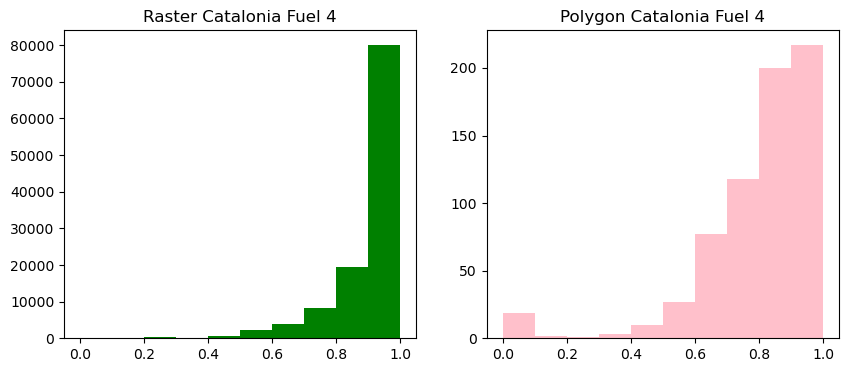

In [59]:
fig = plt.figure(figsize=(10, 4))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
 
ax1.hist(CatFuel4_AI2['AI'], bins=[0,0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90,1], color="green")
ax2.hist(CatFuel4P['AI'], bins= [0,0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90,1], color="pink")
 
ax1.set_title('Raster Catalonia Fuel 4')
ax2.set_title('Polygon Catalonia Fuel 4')

 
plt.show()

In [60]:
# Map of Catalonia with Fuel 5 (Raster format)

In [61]:
e = rasterio.open('/home/coca/Maps_TFM/Raster/Catalonia/CatFuel5.tif')
CatFuel5= e.read(1)
#plt.imshow(CatFuel5)

In [62]:
CatFuel5_AI1, CatFuel5_AI2 = AI_dataframe(CatFuel5)

In [63]:
CatFuel5_AI2

,AI,Position
0,1.00,"[1198, 2185]"
1,0.87,"[1199, 2183]"
2,0.93,"[1199, 2184]"
3,0.88,"[1199, 2185]"
4,0.86,"[1200, 2183]"
...,...,...
821,0.86,"[2461, 402]"
822,0.94,"[2461, 406]"
823,1.00,"[2461, 407]"
824,1.00,"[2461, 408]"


In [64]:
# To save the dataframe to later use
CatFuel5_AI2.to_pickle("/home/coca/Maps_TFM/Raster/Output/AI (different size MW)/MW5/Fuel5/AIMW5Fuel5.pkl")

In [66]:
# To save the array for later use
np.save("/home/coca/Maps_TFM/Raster/Output/AI (different size MW)/MW5/Fuel5/AIMW5Fuel5.npy", CatFuel5_AI1, allow_pickle=True, fix_imports=True)

In [67]:
#To save the array as GeoTiff file
driver = 'GTiff'
height=CatFuel5_AI1.shape[0]
width=CatFuel5_AI1.shape[1]
count=1
dtype=CatFuel5_AI1.dtype

In [68]:
with rasterio.open("/home/coca/Maps_TFM/Raster/Output/AI (different size MW)/MW5/Fuel5/AIMW5Fuel5.tif",'w',
                   driver=driver,
                   height=height,
                   width=width,
                   count=count,
                   dtype=dtype,
                   crs=crs,
                   transform=transform) as dst:
                   dst.write(CatFuel5_AI1, indexes=1)

In [69]:
# Map of Catalonia with Fuel 5 (Polygon format)

In [70]:
CatFuel5P= gpd.read_file("/home/coca/Maps_TFM/Polygon/Catalonia/CatFuel5.geojson")
#CatFuel5P.plot()
CatFuel5P

,Code_18,Remark,Area_Ha,ID,AI,NOMCAT,CAPCAT,AREACA5000,geometry
0,411,None,475.368987,EU_252169,1.000000,Catalunya,Barcelona,32103.99495,"POLYGON ((303781.424 4502136.872, 303768.971 4..."
1,411,None,87.655363,EU_252170,0.952770,Catalunya,Barcelona,32103.99495,"POLYGON ((306798.966 4517484.135, 306810.882 4..."
2,411,None,27.026052,EU_252779,0.936190,Catalunya,Barcelona,32103.99495,"POLYGON ((419700.692 4571526.223, 419699.105 4..."
3,411,None,29.428347,EU_256517,0.809644,Catalunya,Barcelona,32103.99495,"POLYGON ((293272.046 4595293.788, 293276.649 4..."
4,411,None,172.882098,EU_256518,0.973817,Catalunya,Barcelona,32103.99495,"POLYGON ((293760.061 4598662.300, 293737.189 4..."
5,411,None,27.619539,EU_295119,0.870152,Catalunya,Barcelona,32103.99495,"POLYGON ((478639.474 4628154.984, 478651.678 4..."


In [71]:
# Histograms comparison

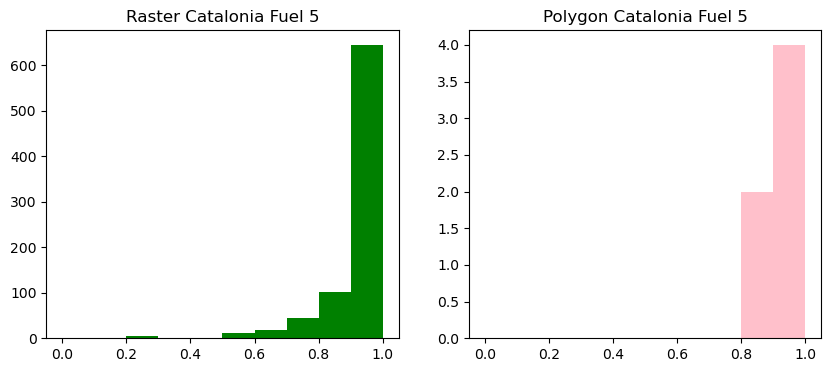

In [72]:
fig = plt.figure(figsize=(10, 4))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
 
ax1.hist(CatFuel5_AI2['AI'], bins=[0,0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90,1], color="green")
ax2.hist(CatFuel5P['AI'], bins= [0,0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90,1], color="pink")
 
ax1.set_title('Raster Catalonia Fuel 5')
ax2.set_title('Polygon Catalonia Fuel 5')

 
plt.show()